# Binaryzacja


### Cel:
- zapoznanie z segmentacją obiektów poprzez binaryzację,
- zapoznanie z binaryzacją na podstawie histogramu (globalną),
- zapoznanie z metodami automatycznego wyznaczania progu Ots'u, Kitller'a i Kapur'a,
- zapoznanie z binaryzacją lokalną (na podstawie średniej i metodą Sauvola),
- zapoznanie z binaryzacją dwuprogową,
- zadanie domowe: zapoznanie z adaptacyjną binaryzacją lokalną.

### Binaryzacja - wprowadzenie

Jednym z najważniejszych etapów podczas analizy obrazów jest segmentacja -- podział obrazu na rejony według pewnego kryterium  -- jasności, koloru, tekstury.
Najprostszą (i też najczęściej wykorzystywaną) metodą segmentacji jest **binaryzacja**. 
Do jej głównych zalet zalicza się: intuicyjność, prostotę, łatwość implementacji i szybkość wykonywania. 
Jest ona etapem wielu algorytmów analizy obrazów. 
Pozwala na znaczną redukcję informacji w obrazie (np. dla wejściowego obrazu w skali szarości z zakresu 0-255 do 0-1).
 
Binaryzacja najczęściej realizowana jest poprzez progowanie. 
Na przykład: dla obrazu w odcieniach szarości ustala się próg na poziomie $k$. 
Wszystkie piksele o wartości (jasności) większej od $k$ zostają uznane za obiekty, a pozostałe za tło. 
Oczywiście podejście takie daje się zastosować wtedy, gdy obiekty mają istotnie różną jasność od otaczającego je tła.


### Binaryzacja na podstawie histogramu

W rozdziale zostanie zademonstrowane wyznaczanie progu na podstawie "ręcznej" analizy histogramu oraz wpływ szumu i niejednorodnego oświetlenia sceny na proces binaryzacji.

1. Potrzebne w ćwiczeniu moduły są już wpisane - zwróć uwagę pod jakimi nazwami będą one widziane (plt, cv2, np).

2. Wczytaj obraz _coins.png_ w trybie odcieni szarości. Wyświetl go. 
Wyznacz jego histogram (funkcja `np.histogram` lub 'cv2.calcHist') i wyświetl go.
Przy wyświetlaniu histogramu warto zwiększyć liczbę wyświetlanych wartości na osi x oraz powiększyć sam wykres (funkcje *plt.xticks(np.arange(0, 256, 20.0))* oraz *plt.rcParams["figure.figsize"] = (10,5)*.
Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.
      


In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/'

fileNames = ["coins.png", "rice.png", "catalogue.png", "bart.png", "figura1.png", "figura2.png", "figura3.png", "figura4.png", "T.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [2]:
def vis_with_hist(filename):
    fig, axs = plt.subplots(1, 2, figsize = (30,5))

    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(f'Obraz {filename}')
    axs[0].axis("off")

    axs[1].plot(hist)
    axs[1].set_xlim([0, 256])
    axs[1].set_title(f'Histogram {filename}')
    axs[1].grid()


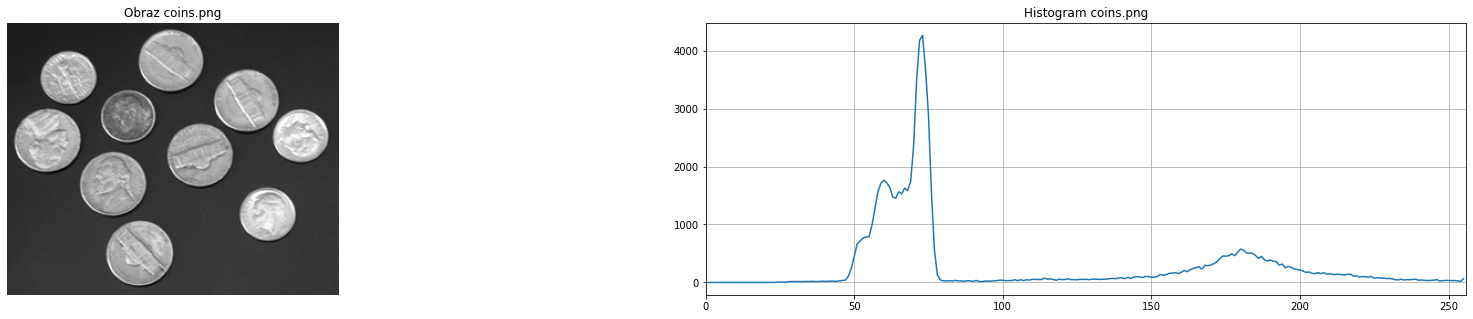

In [3]:
vis_with_hist("coins.png")

3. Wizualna analiza histogramu pozwala zauważyć dwa maksima - jedno odpowiadające poziomowi jasności tła (które w tym przypadku jest względnie jednolite - ciemnoszare) i drugie odpowiadające monetom.

Na podstawie histogramu wyznacz próg i wykonaj binaryzację:
- wykorzystaj fakt, że dla macierzy *numpy* można wykonać operację porównania wszystkich jej wartości z liczbą  - wynikiem jest macierz zawierająca wartości *True* i *False*, którą można przekonwertować metodą macierz.astype(np.int) na macierz z wartościami 1 i 0 (aczkolwiek nie jest to tu konieczne).
- wynik binaryzacji wyświetl,
- spróbuj dobrać jak najlepszy próg binaryzacji. Jako "kryterium jakości" przyjmij kształty monet - dla poprawnie dobranego progu powinny to być wypełnione koła.

Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.

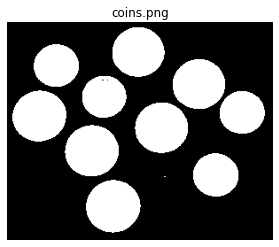

In [4]:
def binearize(filename, threshold): 
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    return np.where(img < threshold, 0, 255).astype("uint8")

def show_binerarize(filename, axs, value):
    img_bin = binearize(filename, value)
    axs.imshow(img_bin, cmap = "gray")
    axs.axis("off")
    if axs == plt:
        axs.title(filename)
    else:
        axs.set_title(filename)
show_binerarize('coins.png', plt, 85)

4. Na "stopień trudności" przeprowadzenia binaryzacji największy wpływ mają dwa czynniki:
- szum,
- niejednorodne oświetlenie.
	  
Użyj obrazy:
 - _figura1.png_ (bez zaszumienia),
 - _figura2.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 10),
 - _figura3.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 50),
 - _figura4.png_ (dodany gradient oświetlenia -- symulacja oświetlenia niejednorodnego) i wyświetl ich histogramy (wykorzystaj funkcję z poprzedniego punktu).


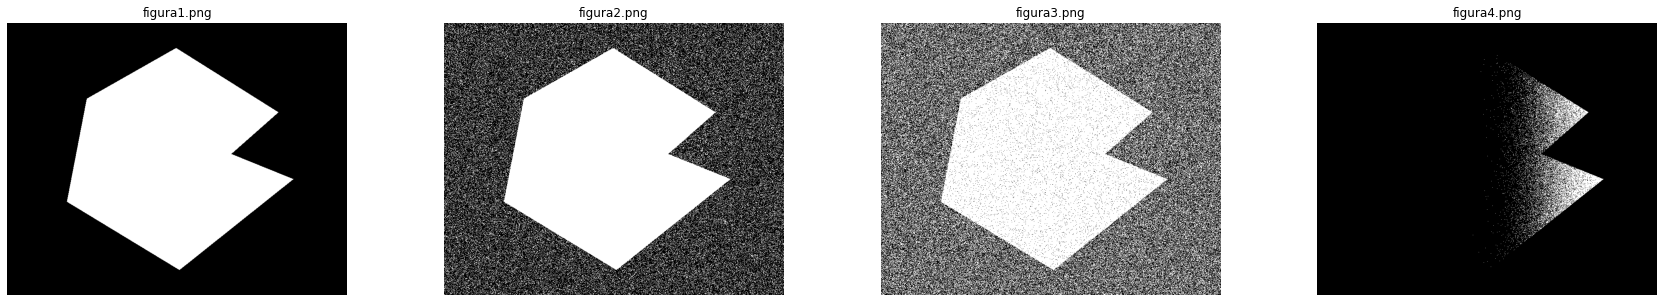

In [5]:
fig, axs = plt.subplots(1, 4, figsize = (30,5))
for i in range(1,5):
    show_binerarize(f"figura{i}.png", axs[i-1], 85)

Spróbuj wyznaczyć progi binaryzacji na podstawie wyświetlonych histogramów. -> 77 <br>
Jak dodanie szumu wypłynęło na histogram i łatwość wyznaczania progu binaryzacji? - > uniemożliwiło klarowne wyznaczenie progu <br>
Czy jest to możliwe we wszystkich przypadkach? 

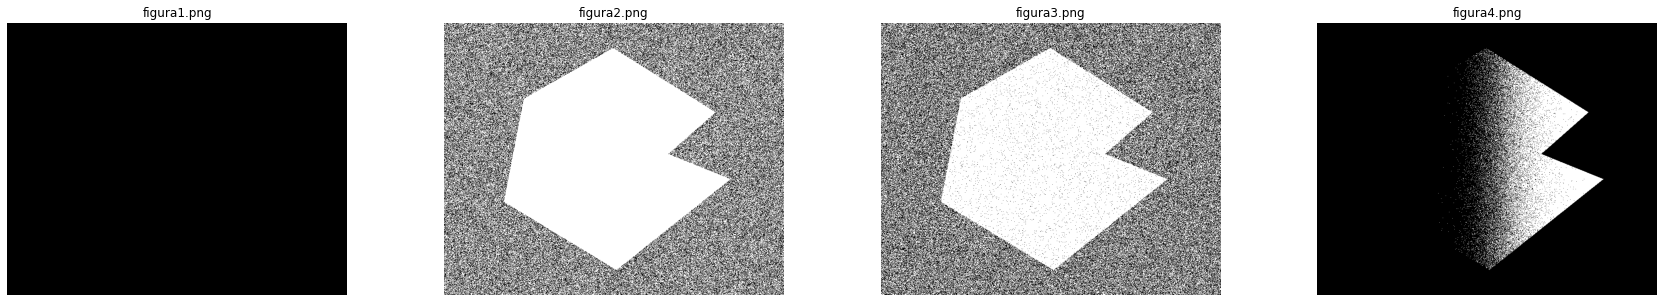

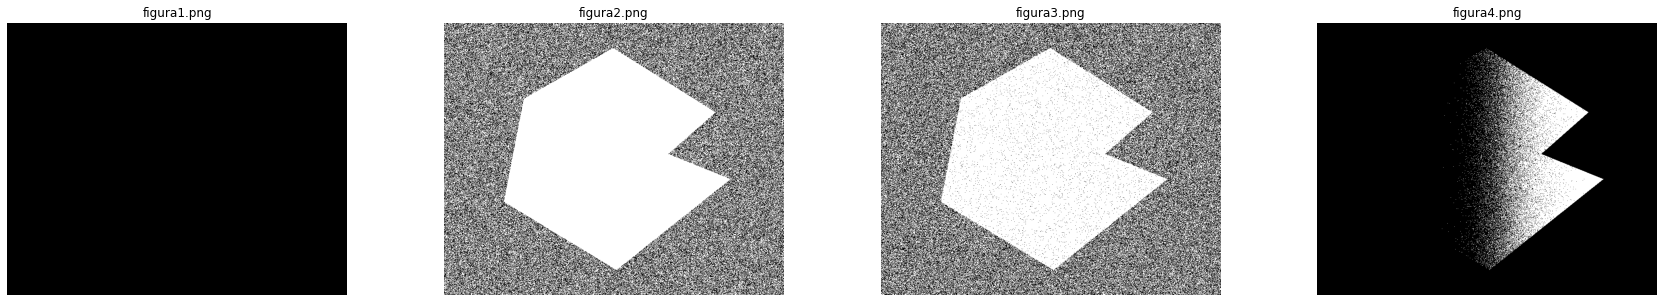

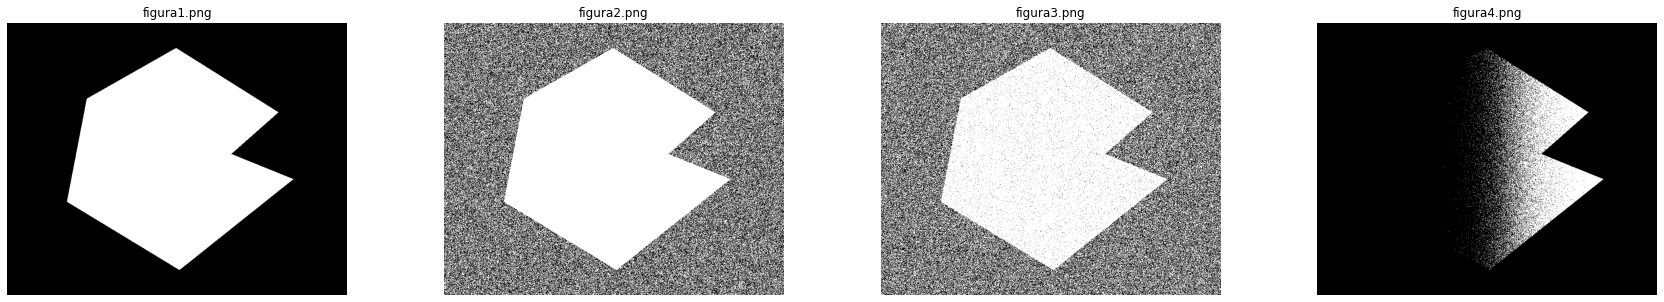

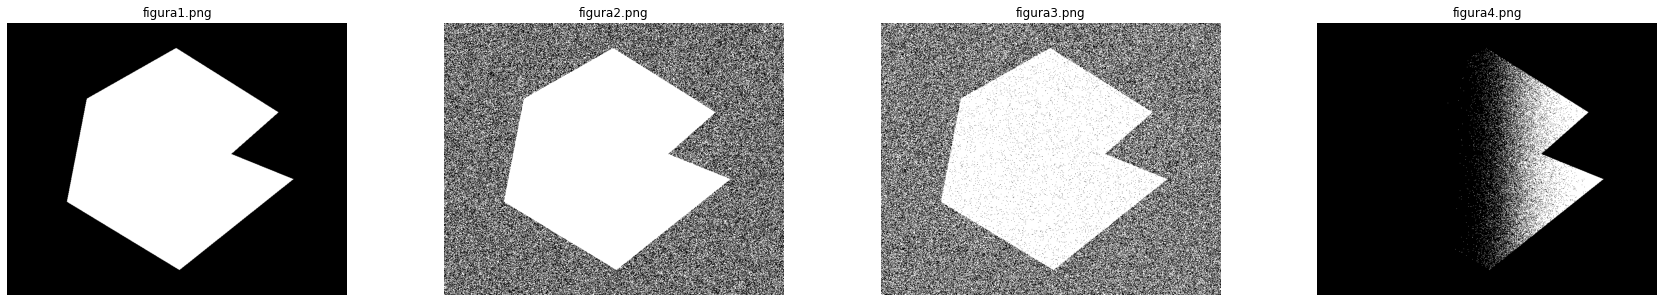

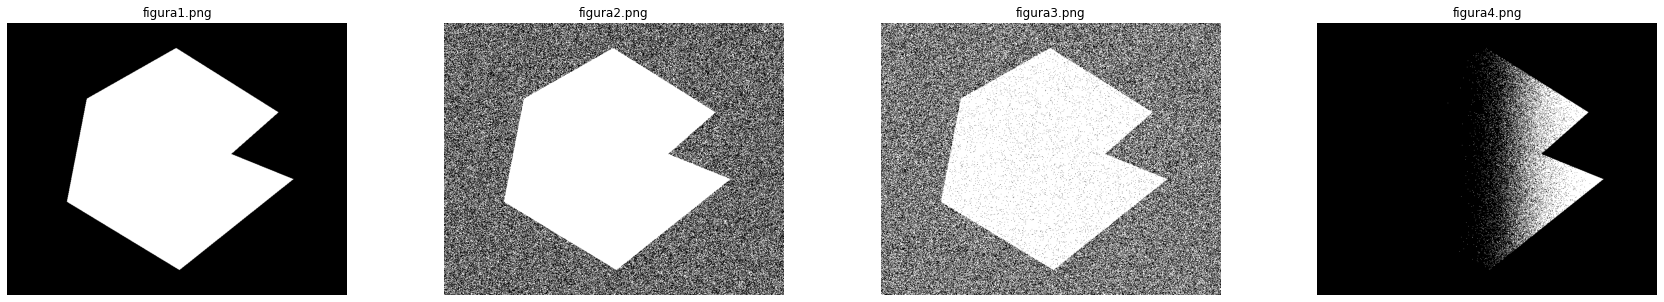

In [6]:
for val in range(75,80):
    fig, axs = plt.subplots(1, 4, figsize = (30,5))
    for i in range(1,5):
        show_binerarize(f"figura{i}.png", axs[i-1], val)

### Automatyczne wyznaczanie progu binaryzacji

W automatycznym systemie analizy obrazów (działanie bez nadzoru operatora) konieczne jest zastosowanie metody binaryzacji, która w sposób automatyczny wyznacza próg binaryzacji.
Oczywiście można sobie wyobrazić użycie stałego progu (np. 10), ale wtedy należy zadbać o niezmienność warunków oświetleniowych, co w niektórych zastosowaniach może być problematyczne.

#### Iteracyjne wyznaczenie progu

Jednym z najprostszych podejść jest iteracyjna procedura wyliczania progu.
Jako pierwsze przybliżenie progu ($k$) przyjmuje się średnia jasność na obrazie.
Następnie, na podstawie $k$,  dzieli się obraz na dwa podobrazy $I_0$ i  $I_1$ (dwie klasy $C_0$ i $C_1$).
Dla każdego z nich oblicza się średnią jasność: $m_0$ i $m_1$.
Jako nowy próg przyjmuje się:
$$
k_{new} = \frac{m_0 + m_1}{2}
$$
Procedurę kontynuuje się do momentu, aż różnica pomiędzy dwoma kolejnymi progami będzie mniejsza niż zadana wartość.


**Zadanie: zaimplementować opisany powyżej algorytm.**


Jak można zauważyć, do poprawnego działania metody potrzebne będzie obliczanie średniej jasności, również dla pewnych podobrazów.
Wykorzystamy do tego znormalizowanych histogram:
$$
p_i = n_i/N,   \sum_{i=0}^L p_i = 1
$$
gdzie: $n_i$ liczba pikseli o jasności $i$ ($i = 0,1, ... L-1$) - histogram, $L$ - liczba poziomów jasności, $N$ - liczba pikseli na obrazie ($N = n_0 + n_1 + ... + n_{L-1}$).

Jeśli podzielimy obraz na dwie klasy $C_0$ i $C_1$ (tło i obiekty albo obiekty i tło) z progiem podziału oznaczonym jako $k$, to do klasy $C_0$ należeć będą piksele o poziomach $[0,k]$, a do klasy $C1$ piksele o poziomach $[k+1,L-1]$.

Wtedy prawdopodobieństwo, że piksel należy do klasy $C_0$ wynosi:
$$
P_0(k) = \sum_{i=0}^{k} p_i
$$

Podobnie prawdopodobieństwo, że należy do klasy $C_1$ wynosi:

$$
P_1(k) = \sum_{i=k+1}^{L-1} p_i = 1 - P_0(k)
$$

Średnią jasność pikseli należących do klasy $C_0$ można wyznaczyć na podstawie:

$$
m_0(k) = \sum_{i=0}^{k} iP(i|C_0)
$$

gdzie: $|$ oznacza prawdopodobieństwo warunkowe, a wyraz $P(i|C_0)$ - prawdopodobieństwo dla wartości $i$ pod warunkiem, że $i$ należy do klasy $C_0$.
Równanie to jest szczególnym przypadkiem wykorzystania momentów statystycznych do wyliczania pewnych parametrów statystycznych - w tym przypadku średniej.

Wykorzystując regułę Bayesa:

$$
P(A|B) = P(B|A)P(A)/P(B)
$$

możemy zapisać:

$$
m_0(k) = \sum_{i=0}^{k} i P(C_0|i)P(i)/P(C_0)
$$
Wyraz $P(C_0|i) = 1$, gdyż z założenia rozpatrujemy tylko piksele należące do klasy $C_0$.
Wyraz $P(i)$ stanowi $i$-ty element znormalizowanego histogramu tj. $P(i) = p_i$, a $P(C_0)$ to prawdopodobieństwo przynależności do klasy $C_0$ określone wcześniej $P(C_0) = P_0(k)$.
Ostatecznie możemy więc zapisać:

$$
m_0(k) = \frac{1}{P_0(k)} \sum_{i=0}^{k} i p_i
$$

Na podstawie analogicznych rozważań można wyprowadzić wzór na średnią jasności pikseli należących do klasy $C_1$:
$$
m_1(k) = \frac{1}{P_1(k)} \sum_{i=k+1}^{L-1} i p_i
$$

Średnia jasność całego obrazu dana jest zależnością:
$$
m_G = \sum_{i=0}^{L-1} ip_i
$$


1. Wczytaj obraz _coins.png_. Wyświetl go.



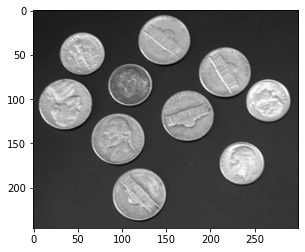

In [7]:
filename = "coins.png"
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

2. Wylicz histogram i histogram skumulowany (funkcja `np.cumsum`).
   Na podstawie zależności (\ref{eq:thresholding:meanHistGlobal}) wylicz średnią - pierwszy próg podziału $k$.
   Uwagi:
   - przed dalszymi obliczeniami dobrze jest usunąć zbędny wymiar tablicy z histogramem - polecenie `np.squeeze`
    - $p_i$ to nasz znormalizowany histogram, a wartości od $0$ do $255$ można wygenerować poleceniem `np.arange(256)`,
    - zmiast pętli `for` można wykorzystać iloczyn sklarny dwóch wektorów tj. `np.dot`.

In [8]:
p = np.zeros(img.shape)
img_norm = cv2.normalize(img, p, 0 ,255, cv2.NORM_MINMAX)

hist = cv2.calcHist([img_norm], [0], None, [256], [0, 256]).squeeze()
cum_hist = np.cumsum(hist)

k = cum_hist.mean()



3.  W nieskończonej petli `while` wykonaj następujące kroki:
- oblicz średnią $m_0$ -- zależność (\ref{eq:thresholding:meanHistC0}):
    - dla $P_0$ wystarczy wykorzystać odpowiednią wartość znormalizowanego histogramu skumulowanego, dla pozostałej części wyrażenia podobne rozwiązanie jak dla pierwszej średniej,
- oblicz średnią $m_1$ -- zależność (\ref{eq:thresholding:meanHistC1}),
- oblicz nowy próg $k_{new}$ -- zależność (\ref{eq:thresholding:mean_auto}),
- oblicz moduł z różnicy pomiędzy $k_{new}$, a $k$ i sprawdź czy jest mniejszy od progu (np. $1$),
- jeśli tak to zakończ obliczenia (`break`), jeśli nie to przypisz $k = k_{new}$ i kontynuuj obliczenia,
- wyświetl próg oraz wynik binaryzacji.

4. Sprawdz jak metoda dziala na obrazach _figura1.png_ do _figura4.png_. 

k = 127.24 for figura1
k = 127.06 for figura2
k = 117.78 for figura3
k = 48.04 for figura4


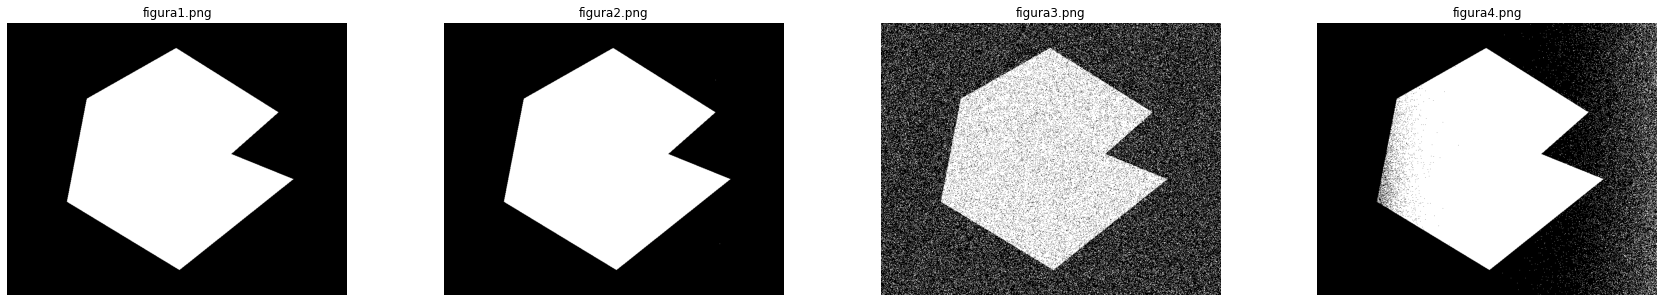

In [9]:
import cv2
import numpy as np

def iterative_thresholding(image, threshold=1):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).squeeze()
    hist_norm = hist / (image.shape[0]*image.shape[1])
    cum_hist = np.cumsum(hist_norm)

    k = np.dot(np.arange(256), hist_norm)

    while True:
        C1 = hist_norm[:int(k+1)]
        C2 = hist_norm[int(k+1):]
        
        p0 = cum_hist[int(k)]
        p1 = 1-p0

        m0 = (1 / p0) * np.dot(np.arange(k), C1)
        m1 = (1 / p1) * np.dot(np.arange(k + 1, 256), C2)

        k_new = (m0 + m1) / 2

        if abs(k_new - k) < threshold:
            break

        k = k_new

    binary_image = np.where(image < k, 0, 256).astype(np.uint8) # binearize

    return k, binary_image


fig, axs = plt.subplots(1, 4, figsize = (30,5))
for i in range(1, 5):
    filename = f"figura{i}.png"
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    k, binary_image = iterative_thresholding(image)
    
    show_binerarize(f"figura{i}.png", axs[i-1], k)
    print(f'k = {k:.2f} for figura{i}')



#### Metoda Otsu

Jednym z często stosowanych algorytmów wyznaczania progu binaryzacji jest metoda zaproponowana w roku 1979 przez Nobuyuki Otsu w artykule pt. "A Threshold Selection Method from Gray-Level Histograms" (dostępny na IEEE Xplore).
W algorytmie zakłada się, że obraz zawiera piksele należące do dwóch klas (obiektów i tła), tj. histogram obrazu jest dwumodalny (ma dwa maksima). Próg podziału obliczany jest tak, aby wariancja międzyklasowa była maksymalna. W tym sensie metodę Otsu można nazwać optymalną.

Wprowadźmy teraz wskaźnik "jakości" wybranego progu podziału $k$, który będziemy optymalizować. W algorytmie Otsu jest to:

$$
\eta(k) = \frac{\sigma^2_B(k)}{\sigma^2_G}
$$

gdzie:  $\sigma^2_G$ - wariancja globalna, która może zostać obliczona na podstawie momentów statystycznych jako:

$$
\sigma^2_G =  \sum_{i=0}^{L-1} (i - m_G)^2 p_i
$$

a $\sigma^2_B$ jest wariancją międzyklasową, zdefiniowaną jako:

$$
\sigma^2_B(k) =  P_0(k)(m_0(k) - m_G)^2 + P_1(k)(m_1(k) - m_G)^2
$$

Równanie to można również przekształcić do:

$$
\sigma^2_B(k) =  P_0(k)P_1(k)(m_0(k) - m_1(k))^2 = \frac{(m_G P_0(k) - m(k) )^2}{P_0(k)(1-P_0(k))}
$$

gdzie:

$$
m(k) = \sum_{i=0}^{k} i p_i
$$

Taki zapis pozwala przyspieszyć obliczenia. Wartość $m_G$ wyznaczana jest jednokrotnie, a zachodzi tylko potrzeba obliczania $m(k)$ i $P_0(k)$ w każdej iteracji. Warto też zwrócić uwagę, że równanie ma sens dla $P_0 > 0$.

Warto zauważyć, że z postaci równania wynika, że im większa odległość pomiędzy średnimi $m_0$ i $m_1$, tym wartość wariancji międzyklasowej jest większa. Pokazuje to, że przyjęty współczynnik może być podstawą do separacji dwóch klas - im jego wartość jest większa, tym lepsze rozdzielenie. Dodatkowo, z równania wynika, że $\eta(k)$ zależy tylko od wariancji międzyklasowej $\sigma^2_B(k)$, gdyż wariancja globalna $\sigma^2_G$ jest stała. Zatem w procesie optymalizacji należy dążyć do maksymalizacji wskaźnika $\eta$.

Należy też pamiętać, że współczynnik jest poprawnie określony tylko dla wartości $\sigma^2_G > 0$. Przy czym, wartość $0$ może on przyjąć tylko dla obrazu o jednym poziomie szarości - w takim przypadku trudno mówić o podziale pikseli na dwie klasy (skoro występuje tylko jedna).

Ostatecznie optymalny próg binaryzacji $\bar{k}$ wyliczamy na podstawie zależności:

$$
\sigma^2_B(\bar{k}) \max\limits_{k \in[0,L-1]} {\sigma^2_B(k) }
$$

Uwagi:
- może się zdarzyć, że znajdziemy więcej niż jedno maksimum tj. więcej wartości $\bar{k}$.
  W takim przypadku zwykle zakłada się, że próg będzie średnią otrzymanych wartości.
- liczby $P_0(\bar{k})$ i $P_1(\bar{k})$ odpowiadają powierzchni zajmowanej przez obiekty klas $C_0$ i $C_1$.
- liczby $m_0(\bar{k})$ i $m_1(\bar{k})$ odpowiadają średniej jasności obiektów klas $C_0$ i $C_1$.
- wartość parametru $\eta(\bar{k})$ określa "jakość" wyznaczonego progu -- im większa tym lepiej.

Zadanie: wykorzystując podane powyżej informacje należy zaimplementować metodę wyznaczania progu binaryzacji zaproponowaną przez Otsu.

1. Wczytaj obraz _coins.png_.
      Wyświetl go.

2. Wyznacz jego histogram znormalizowany oraz oblicz średnią jasność (można do tego wykorzystać histogram) - kod zbliżony do stworzonego wcześniej.

3. Zdefiniuj 256-elementowy wektor na współczynniki $\sigma_B^2$ (funkcja `np.zeros`).

4. W pętli po możliwych wartościach progu binaryzacji wyznacz wartość $\sigma_B^2(k)$ na podstawie zależności (\ref{eq:thresholding:otsu:sigma_B_2}).
      Uwagi:
      - wcześniejszego liczenia wartości $P_0(k)$ i $m(k)$ można uniknąć inkrementując wartośc $P_0, m$  w każdej iteracji.
      - należy pamiętać, że równanie ma sens tylko dla $0 < P_0(k) < 1$. <br>

5. Wyświetl przebieg $\sigma_B^2(k)$.
      Wykorzystaj funkcję `plt.plot`.

6. Wyznacz wartość $\bar{k}$ dla której współczynnik $\sigma_B^2$ jest maksymalny.
	  Można to zrobić poprzez dodanie instrukcji w pętli (rozwiązanie bardziej elegancie) lub wykorzystując funkcję `max` (rozwiązanie dla leniwych).
	  Uwaga. Proszę pominąć obsługę przypadków niejednoznacznego maksimum.

7. Zbinaryzuj obraz wykorzystując otrzymany próg.
      Porównaj wyniki z rezultatem binaryzacji "ręcznej".

8. W OpenCV dostępna jest implementacja metody Otsu - funkcja `cv2.threshold` z parametrem `cv2.THRESH_OTSU`.
      Funkcja zwraca zbinaryzowany obraz oraz próg.
      Wykonaj binaryzację obrazu _coins.png_ metodą Otsu.
      Porównaj wyniki z własną implementacją - powinno wyjść tak samo (tzn. taki sam próg).

9. Przeprowadź eksperyment również na obrazie _rice.png_ i _catalogue.png_

In [10]:
def otsu_threshold(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).squeeze()
    hist_norm = hist / (image.shape[0] * image.shape[1])
    cum_hist = np.cumsum(hist_norm)

    m_g = int(np.round(np.dot(np.arange(256), hist_norm)))
    sigma_b_squared = np.zeros(256)
    sigma_g_squarred = np.dot(((np.arange(256) - m_g) ** 2), hist_norm)
    n_k = np.zeros(256)
    for k in range(256):
        p0 = cum_hist[k]
        p1 = 1 - p0

        if p0 == 0 or p1 == 0:
            continue

        m_k = np.dot(np.arange(k + 1), hist_norm[0:k + 1])
        sigma_b_squared[k] = ((m_g * p0 - m_k) ** 2)/(p0 * p1)
        n_k[k]=(sigma_b_squared[k] / sigma_g_squarred)

    n = np.argmax(sigma_b_squared)


    binary_image = np.where(image < n, 0, 255).astype(np.uint8)

    return n, binary_image


LIBRARY k = 126.00 for coins
k = 126.00 for coins
LIBRARY k = 131.00 for rice
k = 130.00 for rice
LIBRARY k = 128.00 for catalogue
k = 128.00 for catalogue


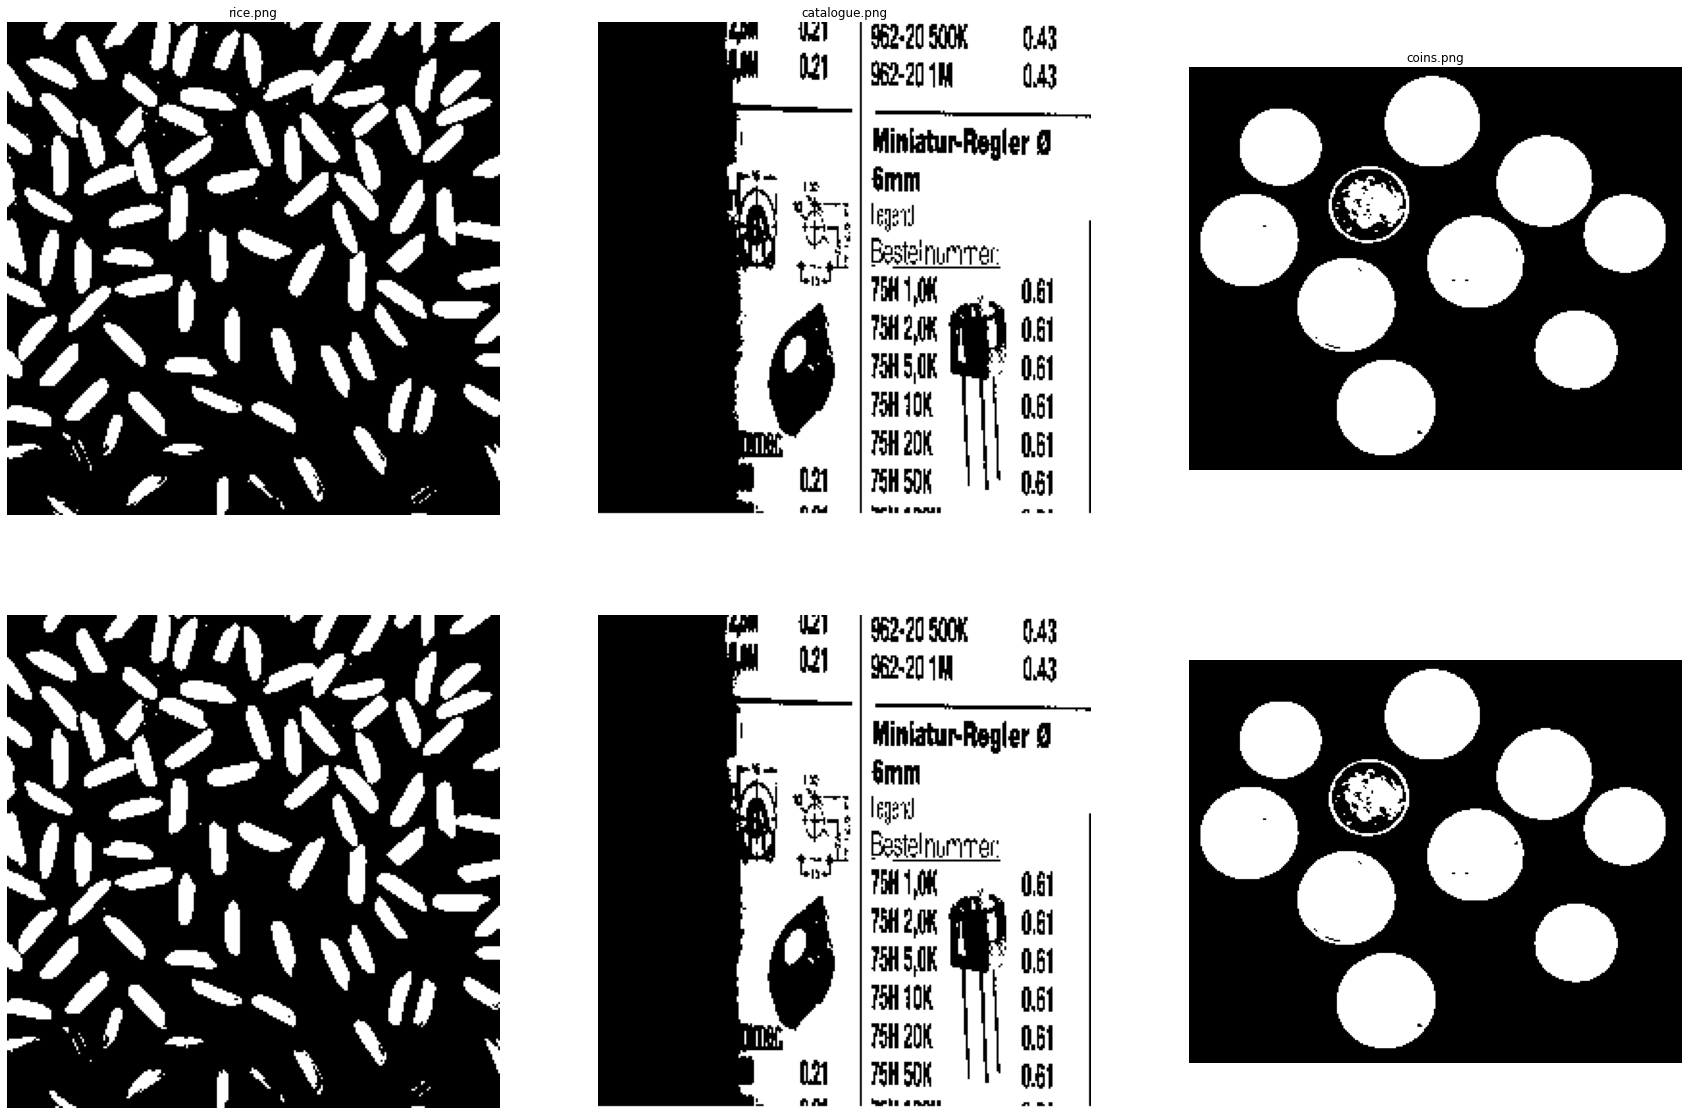

In [11]:
filenames = ['coins.png', 'rice.png', 'catalogue.png']
fig, axs = plt.subplots(2, len(filenames), figsize = (30,20))

for i, filename in enumerate(filenames):

    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    k, binary_image = otsu_threshold(image)
    
    thresh_otsu =  cv2.threshold(image, 0, maxval = 255, type = cv2.THRESH_OTSU)
    print(f'LIBRARY k = {thresh_otsu[0]:.2f} for {filename.split(".")[0]}')

    axs[1][i-1].imshow(thresh_otsu[1],'gray')
    axs[1][i-1].axis("off")

    show_binerarize(filename, axs[0][i-1], k)
    print(f'k = {k:.2f} for {filename.split(".")[0]}')


### Binaryzacja lokalna


Analiza wyników binaryzacji dla obrazów _rice.png_ i _catalogue.png_ pokazuje, że globalna binaryzacja nie najlepiej działa dla obrazów o niejednorodnym oświetleniu.
Dla obu obrazów trudno również wyznaczyć odpowiedni próg "ręcznie".

Metodą, która pozwala poprawić wyniki binaryzacji, jest binaryzacja lokalna (niekiedy zwana adaptacyjną).
W jednym z wariantów polega ona na wyznaczeniu progu osobno dla każdego piksela na podstawie jego otoczenia (tj. własności jego kontekstu, okna).

1. Dla uproszczenia zakładamy, że obraz ma rozmiar $256 \times 256$ pikseli. Przyjmijmy okno analizy o rozmiarze 15 pikseli.

2. Najprostsza wersja binaryzacji lokalnej zakłada, że próg binaryzacji dla danego okna to średnia z pikseli w tym oknie.

3. Wczytaj obraz _rice.png_. Rozmiar obrazka (`X,Y`) można uzyskać stosując taką składnię: `(X, Y) = obraz.shape`.

4. Podstawą algorytmu są dwie pętle `for` iterujące po pikselach obrazka:


	for j in range(W/2, Y-W/2):
	    for i in range(W/2, X-W/2):

5. Wewnątrz pętli należy dla każdego piksela wyciąć jego otoczenie o rozmiarze `W` (operator `:`), wyznaczyć z niego średnią (metoda `mean`) i na jej podstawie dokonać binaryzacji.

6. Wyświetl obrazy oryginalny i zbinaryzowany.

7. Zaobserwuj rezultaty działania metody dla obrazów _rice.png_ i _catalogue.png_.
      Poeksperymentuj z rozmiarem okna (proszę nie przesadzać z rozmiarem, gdyż istotnie wpływa on na czas obliczeń).
      Jaka jest podstawowa wada zaimplementowanej metody? (pomijając złożoność obliczeniową).
      Proszę się zastanowić jakie jest źródło błędów.

In [12]:
def local_bin(image, window_size = 15):

    height, width = image.shape

    binary_image = np.zeros_like(image)

    for j in range(window_size // 2, height - window_size // 2):
        for i in range(window_size // 2, width - window_size // 2):

            window = image[j - window_size // 2: j + window_size // 2 + 1, i - window_size // 2: i + window_size // 2 + 1]

            threshold = np.mean(window)

            if image[j, i] > threshold:
                binary_image[j, i] = 255

    return binary_image


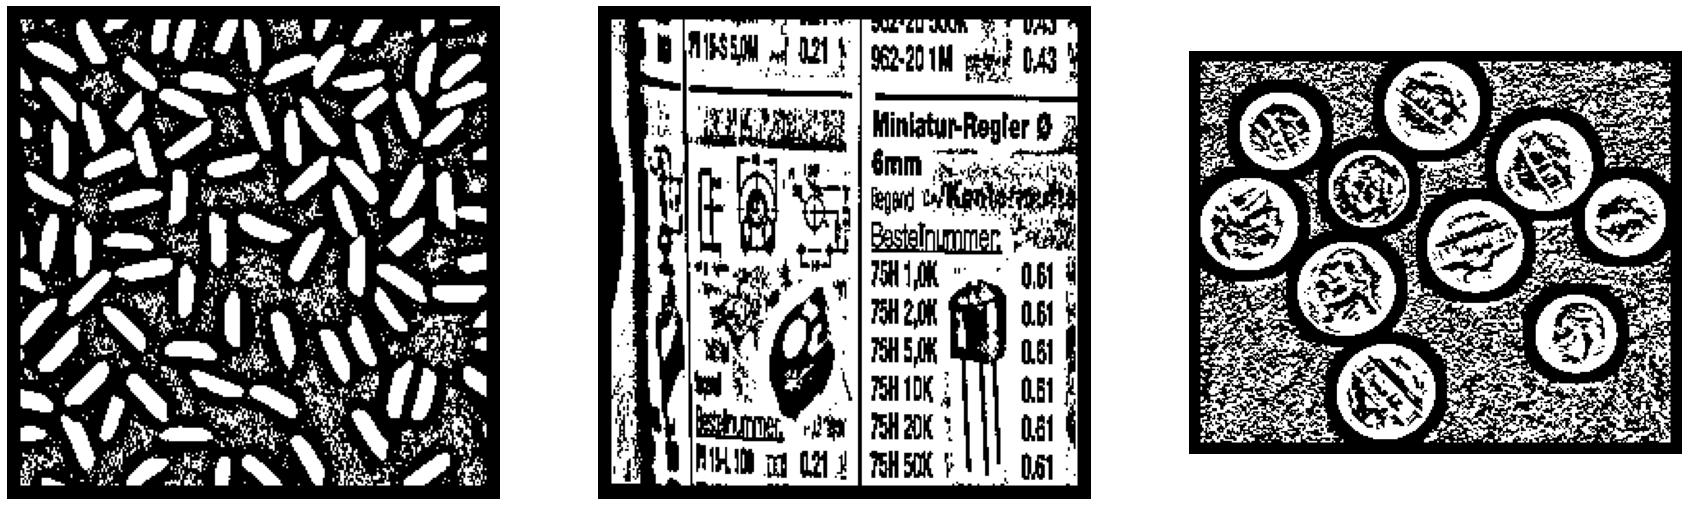

In [13]:
filenames = ['coins.png', 'rice.png', 'catalogue.png']
fig, axs = plt.subplots(1, len(filenames), figsize = (30,20))

for i, filename in enumerate(filenames):

    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    binary_image = local_bin(image)
    
    axs[i-1].imshow(binary_image,'gray')
    axs[i-1].axis("off")

8. Jakość działania binaryzacji lokalnej można poprawić wyznaczając próg za pomocą metody Sauvol'i i Pietikainen'a zaproponowanej w artykule *Adaptive document image binarization*.
Wykorzystuje ona, oprócz średniej, informację o odchyleniu standardowym w danym oknie.
Próg binaryzacji wyznaczany jest na podstawie zależności:
$$
% \label{eq:T} \tag{17} 
T = srednia \{1 \pm k (\frac{odchStd}{R}-1) \}
$$
gdzie: $k$ i $R$ to parametry ($R$ zwykle $128$, a $k$ na początek przyjmij $0.15$), $srednia$ i $odchStd$ to odpowiednio średnia i odchylenie standardowe wyliczone w oknie.

9. Zaimplementuj algorytm Sauvoli - wykorzystaj do wyznaczenia średniej i odchylenia metody `mean()` oraz `std()` liczone dla wycinka (podobnie jak średnia w poprzedniej metodzie).
      
10. Uruchom metodę (uwaga - czas obliczeń nie jest krótki). Przeanalizuj wyniki. Zwróć uwagę, że dodanie informacji o odchyleniu standardowym powinno *poprawić* wyniki binaryzacji.
      Jeżeli dzieje się inaczej, to najprawdopodobniej implementacja zawiera błąd. 
     
11. Zastanów się nad znaczeniem symbolu $\pm$ we wzorze na próg. 
      Kiedy należy zastosować znak +, a kiedy -.

12. Porównaj jakość binaryzacji lokalnej metodą Sauvol'i i z progiem na podstawie średniej. 
      Poeksperymentuj z rozmiarem okna i parametrem k (dla obrazów _rice.png_ i _catalogue.png_).

In [14]:
def sauvola_threshold(image, window_size=15, k=0.15, R=128):
    height, width = image.shape
    binary_image = np.zeros_like(image)

    for j in range(window_size // 2, height - window_size // 2):
        for i in range(window_size // 2, width - window_size // 2):
            window = image[j - window_size // 2: j + window_size // 2 + 1, i - window_size // 2: i + window_size // 2 + 1]
            mean = np.mean(window)
            std = np.std(window)
            threshold = mean * (1 + k * ((std / R) - 1))
            if image[j, i] > threshold:
                binary_image[j, i] = 255

    return binary_image


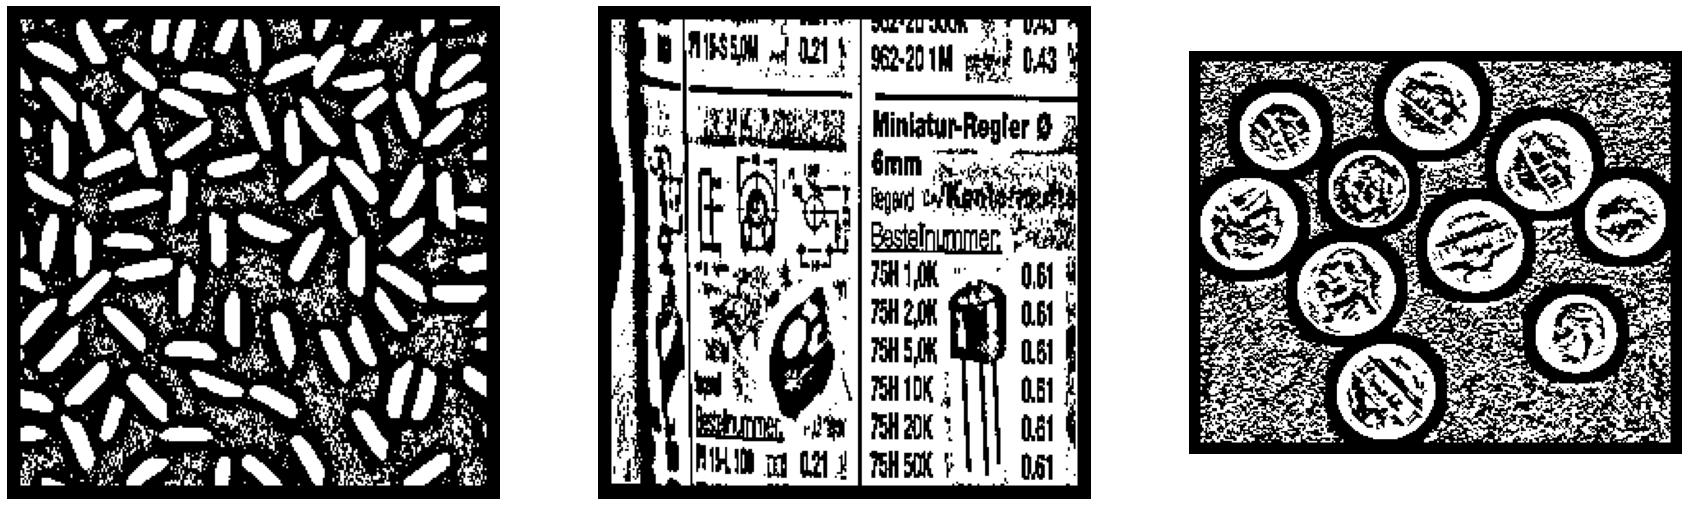

In [15]:
filenames = ['coins.png', 'rice.png', 'catalogue.png']
fig, axs = plt.subplots(1, len(filenames), figsize = (30,20))

for i, filename in enumerate(filenames):

    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    binary_image = local_bin(image)
    
    axs[i-1].imshow(binary_image,'gray')
    axs[i-1].axis("off")

### Binaryzacja dwuprogowa

Binaryzację można przeprowadzić wykorzystując więciej niż jedn próg.
Przykładem jest binaryzacja dwuprogowa - wybieramy w ten sposób przedział jasności (piksele w nim zawarte klasyfikujemy jako obiekty).

1. Wczytaj obraz _bart.png_. 
Wyświetl go, wyznacz i wyświetl jego histogram.
Oceń, który fragment histogramu odpowiada kolorowi skóry Barta Simpsona.<br>
**UWAGA - Aby odczytać wartości pikseli można zapisać obrazek na dysku (`cv2.imwrite('Nazwa.png', Image)`), a następnie odczytać wartościa programem do edycji obrazów, np. *paint*.**<br>

In [81]:
def binearize_two(filename, threshold, threshold2): 
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    return np.where((img < threshold) & (img > threshold2), 0, 255).astype("uint8")

def show_binerarize_two(filename, axs, value, value2):
    img_bin = binearize_two(filename, value, value2)
    axs.imshow(img_bin, cmap = "gray")
    axs.axis("off")
    if axs == plt:
        axs.title(filename)
    else:
        axs.set_title(filename)


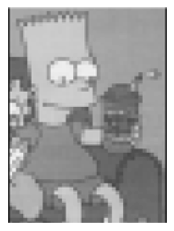

In [107]:
image = cv2.imread('bart.png', cv2.COLOR_BGR2GRAY)
plt.imshow(image, 'gray')
plt.axis("off");

Bart wydaje się mieć dość jasną skórę

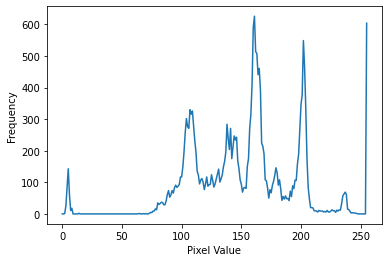

In [84]:
image = cv2.imread('bart.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


Podejrzewam drugi najjaśniejszy przedział - okolice 200

2. Przeprowadź segmentację na podstawie koloru skóry (binaryzację dwuprogową). 
      Wykorzystaj przekształcenie obrazów z wartościami True, False na wartości 1,0 i mnożenie obrazów.
 
3. Wynik wyświetl.

k = 215.00 and k2 = 190 for bart


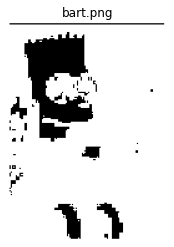

In [98]:
fig, axs = plt.subplots()

filename = 'bart.png'
k2 = 190
k = 215
show_binerarize_two(filename, axs, k, k2)
print(f'k = {k:.2f} and k2 = {k2} for {filename.split(".")[0]}')
